In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
        './data/train',  # This is the source directory for training images # 上一级文件目录
        target_size=(200, 200),  # All images will be resized to 300x300
        batch_size=128, # 一次训练使用的样本数
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 25000 images belonging to 2 classes.


In [15]:
model = tf.keras.Sequential([
    layers.Conv2D(32,(3,3),input_shape = (200,200,3),activation = tf.nn.relu),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation = tf.nn.relu),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(3,3),activation = tf.nn.relu),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512,activation = tf.nn.relu),
    layers.Dense(128,activation = tf.nn.relu),
    layers.Dense(1,activation = tf.nn.sigmoid),
])

In [16]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
             optimizer = tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [42]:
history = model.fit(train_generator,
          steps_per_epoch=8,  
          epochs=20, 
          verbose=1)

Epoch 1/20
8/8 [==============================] - 28s 3s/step - loss: 0.5208 - accuracy: 0.7617
Epoch 2/20
8/8 [==============================] - 28s 3s/step - loss: 0.4874 - accuracy: 0.7607
Epoch 3/20
8/8 [==============================] - 27s 3s/step - loss: 0.5364 - accuracy: 0.7295
Epoch 4/20
8/8 [==============================] - 29s 4s/step - loss: 0.5435 - accuracy: 0.7266
Epoch 5/20
8/8 [==============================] - 27s 3s/step - loss: 0.5572 - accuracy: 0.7139
Epoch 6/20
8/8 [==============================] - 27s 3s/step - loss: 0.5585 - accuracy: 0.7070
Epoch 7/20
8/8 [==============================] - 21s 3s/step - loss: 0.5189 - accuracy: 0.7393
Epoch 8/20
8/8 [==============================] - 23s 3s/step - loss: 0.5040 - accuracy: 0.7588
Epoch 9/20
8/8 [==============================] - 27s 3s/step - loss: 0.5056 - accuracy: 0.7510
Epoch 10/20
8/8 [==============================] - 27s 3s/step - loss: 0.5120 - accuracy: 0.7588
Epoch 11/20
8/8 [======================

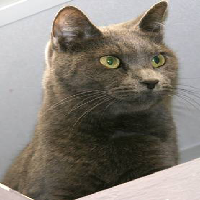

In [43]:
from keras.preprocessing import image
path = r'C:\Users\Perry_Lu\Desktop\ML\ML projects\dogs and cats\data\test1\11.jpg'
img = image.load_img(path, target_size=(200, 200))
img

In [44]:
x = image.img_to_array(img)
x/=255
x = np.expand_dims(x,axis = 0)
x.shape
model.predict(x)[0]

array([0.04577449], dtype=float32)

In [45]:
if model.predict(x)[0][0]>0.5:
    print('This is a dog.')
else:
    print("This is a cat.")

This is a cat.


In [57]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs   = range(len(acc)) # Get number of epochs

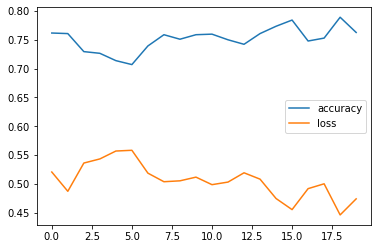

In [61]:
plt.plot(epochs,acc,label = 'accuracy')
plt.plot(epochs,loss, label = 'loss')
plt.legend()